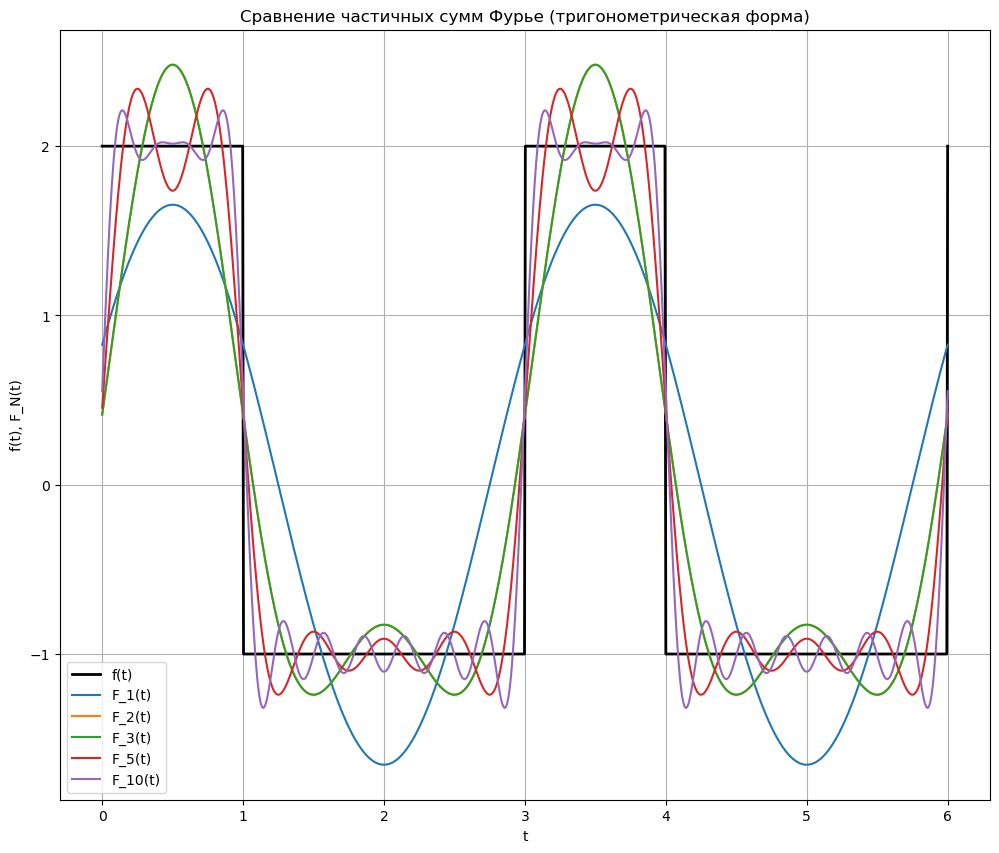

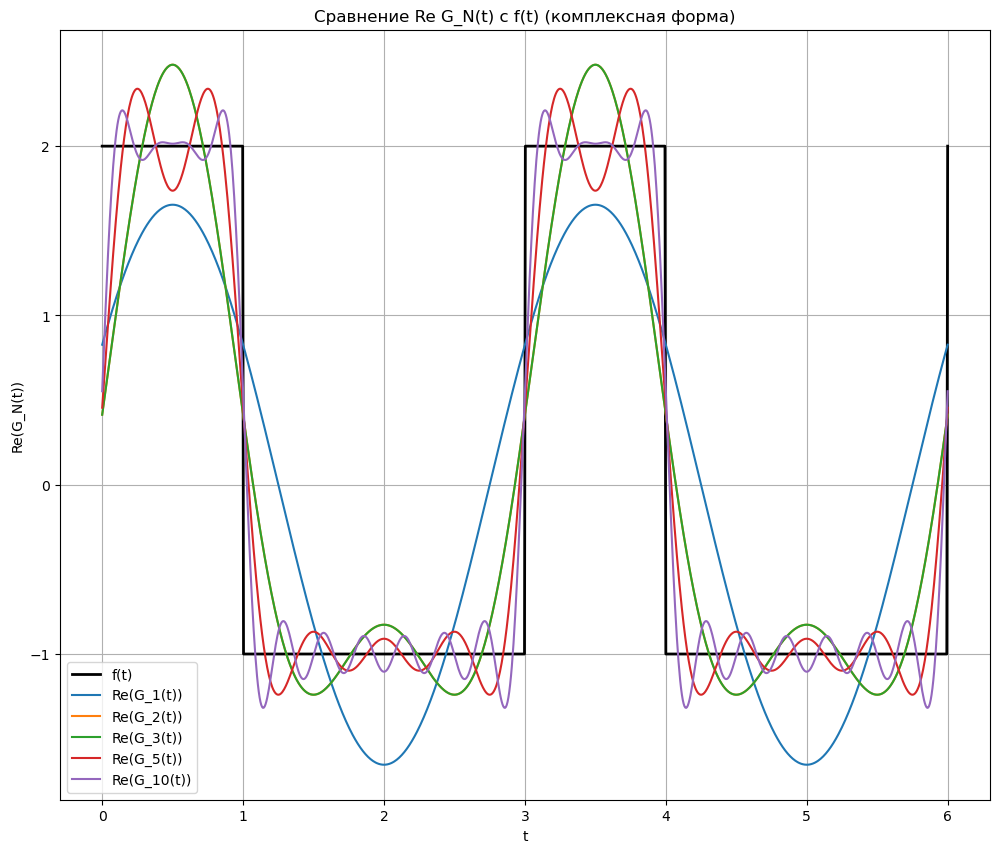

Парсеваль (тригонометрическая): 1.982123224871661
Парсеваль (комплексная): 1.9821232248716611


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Параметры функции
a, b = 2, -1
t0, t1, t2 = 0, 1, 3
T = t2 - t0
ω = lambda n: 2 * np.pi * n / T

# Определение исходной функции f(t)
def f(t):
    t_mod = t % T
    if t_mod < t1:
        return a
    else:
        return b

f_vec = np.vectorize(f)

# Вычисление коэффициентов a_n, b_n
def a_n(n):
    integrand = lambda t: f(t) * np.cos(ω(n) * t)
    return (2 / T) * quad(integrand, t0, t2)[0]

def b_n(n):
    integrand = lambda t: f(t) * np.sin(ω(n) * t)
    return (2 / T) * quad(integrand, t0, t2)[0]

# Комплексные коэффициенты c_n
def c_n(n):
    if n == 0:
        return a_n(0) / 2
    elif n > 0:
        return (a_n(n) - 1j * b_n(n)) / 2
    else:
        return (a_n(-n) + 1j * b_n(-n)) / 2

# Частичная сумма Фурье (тригонометрическая)
def F_N(t, N):
    sum_ = a_n(0) / 2
    for n in range(1, N + 1):
        sum_ += a_n(n) * np.cos(ω(n) * t) + b_n(n) * np.sin(ω(n) * t)
    return sum_

# Частичная сумма Фурье (комплексная)
def G_N(t, N):
    result = 0
    for n in range(-N, N + 1):
        result += c_n(n) * np.exp(1j * ω(n) * t)
    return result

# Построение графиков
t_vals = np.linspace(0, 6, 1000)  # два периода

N_vals = [1, 2, 3, 5, 10]

plt.figure(figsize=(12, 10))
plt.plot(t_vals, f_vec(t_vals), label="f(t)", color='black', linewidth=2)

for N in N_vals:
    F_vals = [F_N(t, N) for t in t_vals]
    plt.plot(t_vals, F_vals, label=f"F_{N}(t)")

plt.title("Сравнение частичных сумм Фурье (тригонометрическая форма)")
plt.xlabel("t")
plt.ylabel("f(t), F_N(t)")
plt.legend()
plt.grid(True)
plt.show()

# Отдельный график для комплексной формы
plt.figure(figsize=(12, 10))
plt.plot(t_vals, f_vec(t_vals), label="f(t)", color='black', linewidth=2)

for N in N_vals:
    G_vals = [G_N(t, N).real for t in t_vals]
    plt.plot(t_vals, G_vals, label=f"Re(G_{N}(t))")

plt.title("Сравнение Re G_N(t) с f(t) (комплексная форма)")
plt.xlabel("t")
plt.ylabel("Re(G_N(t))")
plt.legend()
plt.grid(True)
plt.show()

# Проверка равенства Парсеваля
def parseval_real(N):
    sum_ = a_n(0)**2 / 2
    for n in range(1, N + 1):
        sum_ += (a_n(n)**2 + b_n(n)**2) / 2
    return sum_

def parseval_complex(N):
    return sum(abs(c_n(n))**2 for n in range(-N, N + 1))

N = 50
print("Парсеваль (тригонометрическая):", parseval_real(N))
print("Парсеваль (комплексная):", parseval_complex(N))


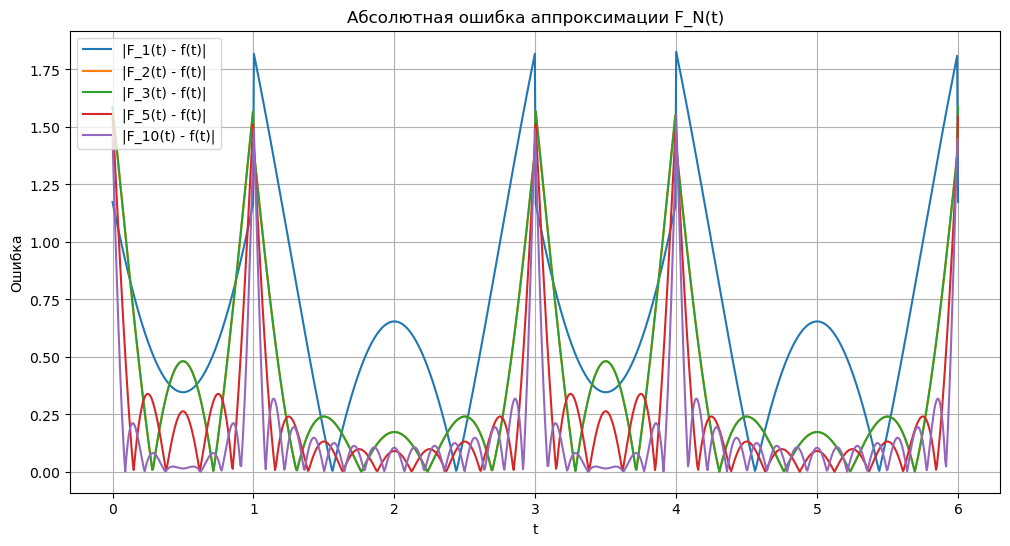

In [2]:
# График ошибки аппроксимации
plt.figure(figsize=(12, 6))
for N in N_vals:
    error = np.abs(np.array([F_N(t, N) for t in t_vals]) - f_vec(t_vals))
    plt.plot(t_vals, error, label=f"|F_{N}(t) - f(t)|")

plt.title("Абсолютная ошибка аппроксимации F_N(t)")
plt.xlabel("t")
plt.ylabel("Ошибка")
plt.legend()
plt.grid(True)
plt.show()
